In [2]:
from localgraphclustering import *

import time
import numpy as np

# Import the graph_tool module for visualization.
from graph_tool.all import * 

# Import matplotlib 
import matplotlib.pyplot as plt

# Just a useful function.
def diff(a, b):
        b = set(b)
        return np.asarray([aa for aa in a if aa not in b], dtype = 'int64')

# Load Protein-Protein interaction graph

In [3]:
# Read graph. This also supports gml and graphml format.
# The MIPS Mammalian Protein-Protein Database is a database for protein-protein interactions of mammalian species. 
# We used the data set proposed in consisting of a subset of 220 protein complexes of 1562 proteins. 
# Details can be found here: https://clusteval.sdu.dk/1/datasets/685
g = graph_class_local.GraphLocal('./datasets/ppi_mips.graphml','graphml',' ')

/Users/mengliu/Library/Python/3.6/lib/python/site-packages/localgraphclustering/graph_class_local.py:359: UserWarning: Loading a graphml is not efficient, we suggest using an edgelist format for this API.
  warnings.warn("Loading a graphml is not efficient, we suggest using an edgelist format for this API.")


## Compute layout for visualization

In [4]:
# Add data to graphtool.
g_gtool = load_graph("./datasets/ppi_mips.graphml")
    
remove_self_loops(g_gtool)

# Load pre-computed coordinates for nodes.
ld_coord = np.loadtxt('./datasets/ppi_mips_coordinates.xy', dtype = 'str')

temp = []
for i in ld_coord:
    temp.append(i[0])

idxs = dict(zip(temp, range(len(temp)))) 

pos = g_gtool.new_vertex_property("vector<double>")
for i in ld_coord:
    pos[idxs[i[0]]] = i[1:3]

## Visualize the PPI graph and its ground truth

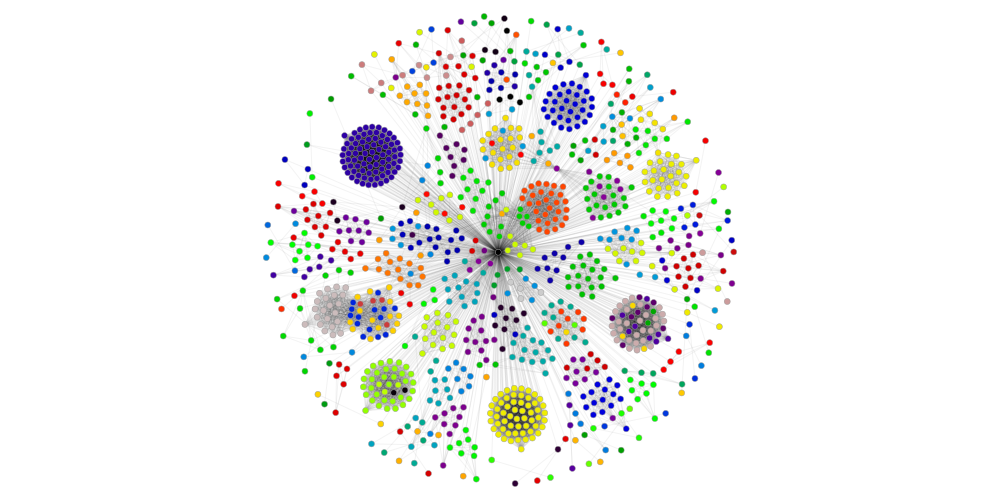

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x12c12b080, at 0x124c95080>

In [5]:
ld_coord = np.loadtxt('./datasets/ppi_mips_ground_truth.csv', dtype = 'str')

cluster_type = []
for i in ld_coord:
    cluster_type.append(i[1])
cluster_type_set = set(cluster_type)

idxs_cluster_type = dict(zip(cluster_type_set, range(len(cluster_type_set)))) 

protein_color = np.zeros(len(cluster_type))
for i in range(len(cluster_type)):
    protein_color[idxs[ld_coord[i][0]]] = idxs_cluster_type[ld_coord[i][1]]
    
# Plot solutions for rounded eigenvector
node_colours = g_gtool.new_vertex_property("double",protein_color)

temp = np.zeros(g._num_vertices) + 6

node_size = g_gtool.new_vertex_property("double",temp)

c_map = plt.get_cmap('nipy_spectral')

graph_draw(g_gtool, pos, output_size=(1000, 500),
           vertex_size=node_size, 
           vertex_fill_color=node_colours, 
           vorder=node_size,
           edge_pen_width=1,
           edge_color = [0.0, 0, 0, 0.05],
           vcmap = c_map)

## Localized vector using l1-regularized PageRank

In [6]:
# Create an object for an accelerated L1-regularized PageRank solver.
l1reg_fast = l1_regularized_PageRank_fast.L1_regularized_PageRank_fast()

# Find the solution of L1-regularized PageRank using localized accelerated gradient descent.
# This method is the fastest among other l1-regularized solvers and other approximate PageRank solvers.
reference_node = 100
output_l1reg_fast = l1reg_fast.produce([g],[reference_node],rho=4.0e-5)

# Only one input graph is given, i.e., [g]. 
# Extract the array from position 0 and store it.
l1_reg_vector = output_l1reg_fast[0]

In [7]:
poses = np.nonzero(l1_reg_vector)[0]
for i in poses:
    print(output_l1reg_fast[0][i])

0.0002558120007384044
0.00026656601878394227
0.00027731942533452833
0.0002880722087283889
0.00029882435700531745
0.0003095758578970713
0.00032032669881738624
0.000331076866851608
0.0003418263487459123
0.00035257513089609403
0.00036332319933591196
0.0003740705397249674
0.0003848171373360905
0.00039556297704220714
0.00040630804330267994
0.0004170523201490714
0.0004277957911703259
0.0004385384394973248
0.0004492802477867922
0.0004600211982045185
0.0004707612724078657
0.0004814910856907115
0.0004922194273973506
0.000502946691894865
0.0005136728555150089
0.0005243978938910493
0.0005351217819318052
0.0005458444937945252
0.0005565660028565302
0.0005672862816855748
0.0005780053020088317
0.0005887230346804549
0.0005994394496476142
0.000610154515914939
0.0006208682015072846
0.0006315804734306986
0.0006422912976315245
0.0006530006389535128
0.26156509149394747
0.0006744147265508646
0.0006851193965846304
0.0006958224311547611
0.0007065237888708058
0.0007172234269337637
0.0007279213010756521
0.00073

In [8]:
poses = np.nonzero(l1_reg_vector)[0]
for i in poses:
    print(output_l1reg_fast[0][i])

0.0002558120007384044
0.00026656601878394227
0.00027731942533452833
0.0002880722087283889
0.00029882435700531745
0.0003095758578970713
0.00032032669881738624
0.000331076866851608
0.0003418263487459123
0.00035257513089609403
0.00036332319933591196
0.0003740705397249674
0.0003848171373360905
0.00039556297704220714
0.00040630804330267994
0.0004170523201490714
0.0004277957911703259
0.0004385384394973248
0.0004492802477867922
0.0004600211982045185
0.0004707612724078657
0.0004814910856907115
0.0004922194273973506
0.000502946691894865
0.0005136728555150089
0.0005243978938910493
0.0005351217819318052
0.0005458444937945252
0.0005565660028565302
0.0005672862816855748
0.0005780053020088317
0.0005887230346804549
0.0005994394496476142
0.000610154515914939
0.0006208682015072846
0.0006315804734306986
0.0006422912976315245
0.0006530006389535128
0.26156509149394747
0.0006744147265508646
0.0006851193965846304
0.0006958224311547611
0.0007065237888708058
0.0007172234269337637
0.0007279213010756521
0.00073

## Visualize the solution

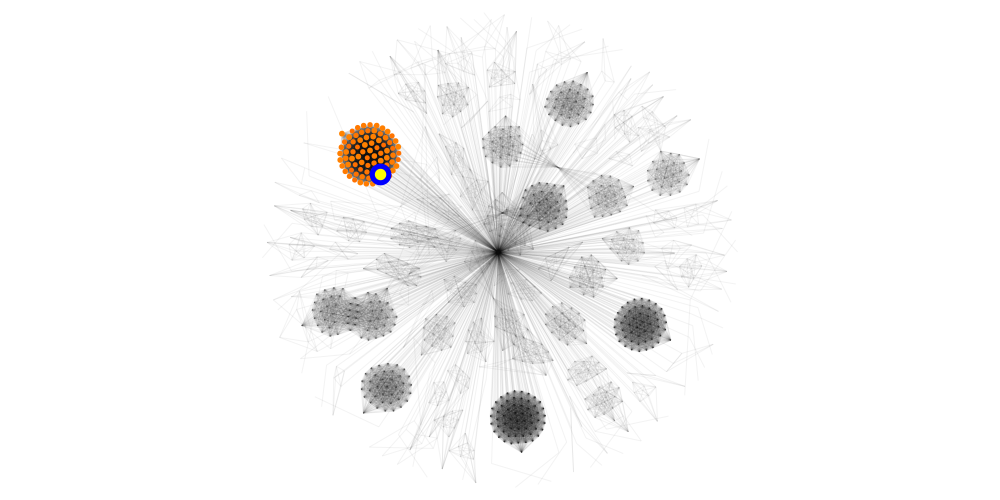

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x12c12b080, at 0x124c95080>

In [9]:
# Some pre-processing to make visualization better.
temp = np.copy(l1_reg_vector)
nnz_temp = temp.nonzero()
nnz_temp = nnz_temp[0]
temp[nnz_temp] = -np.log(temp[nnz_temp])
temp[nnz_temp] = 100/temp[nnz_temp]
temp = temp + 0.0001
max_all = max(temp)
temp[reference_node] = max_all/2.6
temp = temp/np.linalg.norm(temp, 2)

halo = np.zeros(g._num_vertices, dtype=bool)
halo[reference_node] = True
node_halo   = g_gtool.new_vertex_property("bool",halo)

node_weights = g_gtool.new_vertex_property("double",temp)
node_size = g_gtool.new_vertex_property("double",np.abs(temp)*50)

c_map = plt.get_cmap('autumn')

graph_draw(g_gtool, pos, output_size=(1000, 500),
           vertex_size=node_size, vertex_fill_color=node_weights, vorder=node_size,
           vertex_halo=node_halo,
           vertex_halo_size = 1.9,
           vertex_halo_color = "blue",
           edge_pen_width=1,
           edge_color = [0.0, 0, 0, 0.05],
           vcmap = c_map)

## Obtain the partition using the localized vector from l1-regularized PageRank

In [10]:
# Create an object for a C++ version of the sweep cut rounding procedure.
sc_fast = sweepCut_fast.SweepCut_fast()

# Call C++ version of sweep cut rounding on the l1-regularized PageRank solution.
output_sc_fast = sc_fast.produce([g],p=l1_reg_vector)

# Extract the partition for g and store it.
l1_reg_vector_rounded = output_sc_fast[0][0]
print(l1_reg_vector_rounded)

[100, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62]


In [11]:
print(l1_reg_vector_rounded)

[100, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62]


## Visualize local partitioning

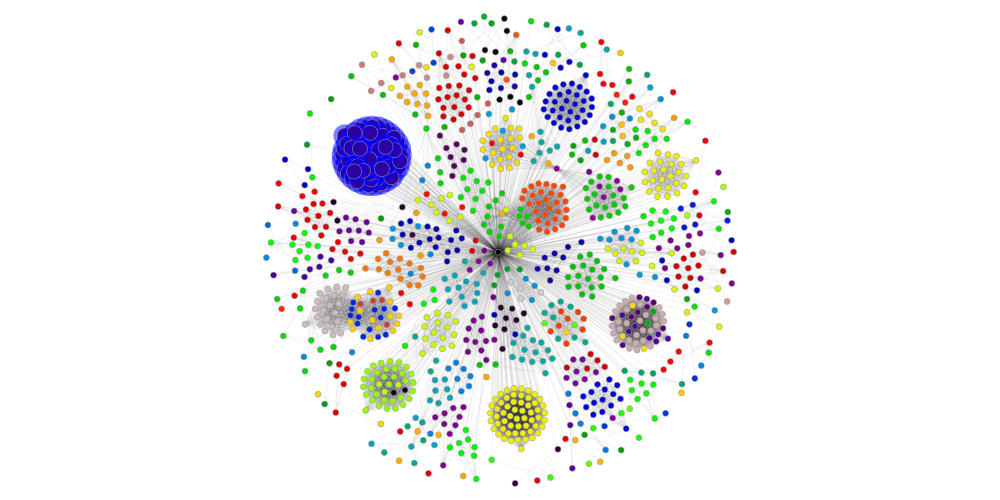

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x12c12b080, at 0x124c95080>

In [12]:
# Plot solutions for rounded eigenvector
temp = np.zeros(g._num_vertices) + 6

temp[l1_reg_vector_rounded] = 15

node_size = g_gtool.new_vertex_property("double",temp)

halo = np.zeros(g._num_vertices, dtype=bool)
halo[l1_reg_vector_rounded] = True
node_halo   = g_gtool.new_vertex_property("bool",halo)

c_map = plt.get_cmap('nipy_spectral')

graph_draw(g_gtool, pos, output_size=(1000, 500),
           vertex_size=node_size, 
           vertex_fill_color=node_colours, 
           vorder=node_size,
           vertex_halo=node_halo,
           edge_pen_width=1,
           edge_color = [0.0, 0, 0, 0.05],
           vcmap = c_map)

# Load Blasted Sequences graph

In [13]:
# Read graph. This also supports gml and graphml format.
# The data set contains pairwise similarities of blasted 
# sequences of 232 proteins belonging to the amidohydrolase superfamily. 
g = graph_class_local.GraphLocal('./datasets/sfld_brown_et_al_amidohydrolases_protein_similarities_for_beh.graphml','graphml',' ')

/Users/mengliu/Library/Python/3.6/lib/python/site-packages/localgraphclustering/graph_class_local.py:359: UserWarning: Loading a graphml is not efficient, we suggest using an edgelist format for this API.
  warnings.warn("Loading a graphml is not efficient, we suggest using an edgelist format for this API.")


## Compute layout for visualization

In [14]:
# Add data to graphtool.
g_gtool = load_graph("./datasets/sfld_brown_et_al_amidohydrolases_protein_similarities_for_beh.graphml")
    
remove_self_loops(g_gtool)

# Load pre-computed coordinates for nodes.
ld_coord = np.loadtxt('./datasets/sfld_brown_et_al_amidohydrolases_protein_similarities_for_beh_coordinates.xy', dtype = 'str')

temp = []
for i in ld_coord:
    temp.append(i[0])

idxs = dict(zip(temp, range(len(temp)))) 

pos = g_gtool.new_vertex_property("vector<double>")
for i in ld_coord:
    pos[idxs[i[0]]] = i[1:3]

## Visualize the Blasted Sequences graph

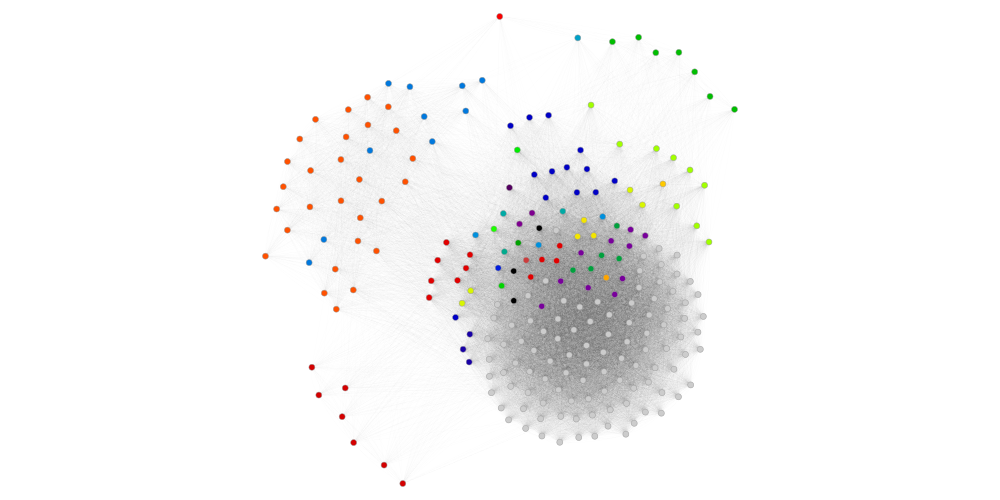

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x12eaa6358, at 0x12eaace48>

In [15]:
ld_coord = np.loadtxt('./datasets/sfld_brown_et_al_amidohydrolases_protein_similarities_for_beh_ground_truth.csv', dtype = 'str')

cluster_type = []
for i in ld_coord:
    cluster_type.append(i[1])
cluster_type_set = set(cluster_type)

idxs_cluster_type = dict(zip(cluster_type_set, range(len(cluster_type_set)))) 

protein_color = np.zeros(len(cluster_type))
for i in range(len(cluster_type)):
    protein_color[idxs[ld_coord[i][0]]] = idxs_cluster_type[ld_coord[i][1]]
    
# Plot solutions for rounded eigenvector
node_colours = g_gtool.new_vertex_property("double",protein_color)

temp = np.zeros(g._num_vertices) + 6

node_size = g_gtool.new_vertex_property("double",temp)

c_map = plt.get_cmap('nipy_spectral')

graph_draw(g_gtool, pos, output_size=(1000, 500),
           vertex_size=node_size, 
           vertex_fill_color=node_colours, 
           vorder=node_size,
           edge_pen_width=0.1,
           edge_color = [0.0, 0, 0, 0.05],
           vcmap = c_map)

## Localized vector using l1-regularized PageRank

In [16]:
# Create an object for an accelerated L1-regularized PageRank solver.
l1reg_fast = l1_regularized_PageRank_fast.L1_regularized_PageRank_fast()

# Find the solution of L1-regularized PageRank using localized accelerated gradient descent.
# This method is the fastest among other l1-regularized solvers and other approximate PageRank solvers.
reference_node = 196
output_l1reg_fast = l1reg_fast.produce([g],[reference_node],rho=2.0e-4)

# Only one input graph is given, i.e., [g]. 
# Extract the array from position 0 and store it.
l1_reg_vector = output_l1reg_fast[0]

## Visualize the solution

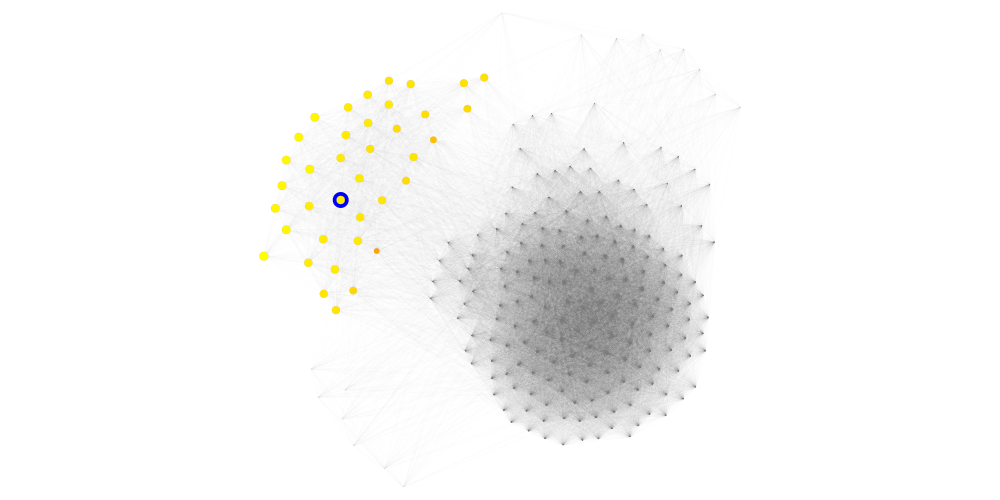

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x12eaa6358, at 0x12eaace48>

In [17]:
# Some pre-processing to make visualization better.
temp = np.copy(l1_reg_vector)
nnz_temp = temp.nonzero()
nnz_temp = nnz_temp[0]
temp[nnz_temp] = -np.log(temp[nnz_temp])
temp[nnz_temp] = 100/temp[nnz_temp]
temp = temp + 0.0001
max_all = max(temp)
temp[reference_node] = max_all/5
temp = temp/np.linalg.norm(temp, 2)

halo = np.zeros(g._num_vertices, dtype=bool)
halo[reference_node] = True
node_halo   = g_gtool.new_vertex_property("bool",halo)

node_weights = g_gtool.new_vertex_property("double",temp)
node_size = g_gtool.new_vertex_property("double",np.abs(temp)*50)

c_map = plt.get_cmap('autumn')

graph_draw(g_gtool, pos, output_size=(1000, 500),
           vertex_size=node_size, vertex_fill_color=node_weights, vorder=node_size,
           vertex_halo=node_halo,
           vertex_halo_size = 1.9,
           vertex_halo_color = "blue",
           edge_pen_width=0.1,
           edge_color = [0.0, 0, 0, 0.05],
           vcmap = c_map)

## Obtain the partition using the localized vector from l1-regularized PageRank

In [18]:
# Create an object for a C++ version of the sweep cut rounding procedure.
sc_fast = sweepCut_fast.SweepCut_fast()

# Call C++ version of sweep cut rounding on the l1-regularized PageRank solution.
output_sc_fast = sc_fast.produce([g],p=l1_reg_vector)

# Extract the partition for g and store it.
l1_reg_vector_rounded = output_sc_fast[0][0]

## Visualize local partitioning

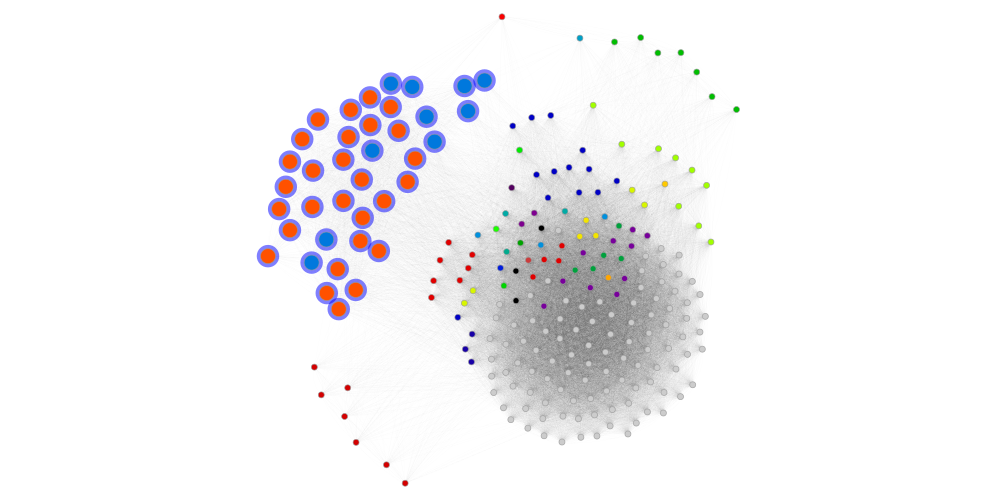

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x12eaa6358, at 0x12eaace48>

In [19]:
# Plot solutions for rounded eigenvector
temp = np.zeros(g._num_vertices) + 6

temp[l1_reg_vector_rounded] = 15

node_size = g_gtool.new_vertex_property("double",temp)

halo = np.zeros(g._num_vertices, dtype=bool)
halo[l1_reg_vector_rounded] = True
node_halo   = g_gtool.new_vertex_property("bool",halo)

c_map = plt.get_cmap('nipy_spectral')

graph_draw(g_gtool, pos, output_size=(1000, 500),
           vertex_size=node_size, 
           vertex_fill_color=node_colours, 
           vorder=node_size,
           vertex_halo=node_halo,
           edge_pen_width=0.1,
           edge_color = [0.0, 0, 0, 0.05],
           vcmap = c_map)

## Localized vector using l1-regularized PageRank

In [20]:
# Create an object for an accelerated L1-regularized PageRank solver.
l1reg_fast = l1_regularized_PageRank_fast.L1_regularized_PageRank_fast()

# Find the solution of L1-regularized PageRank using localized accelerated gradient descent.
# This method is the fastest among other l1-regularized solvers and other approximate PageRank solvers.
reference_node = 84
output_l1reg_fast = l1reg_fast.produce([g],[reference_node],rho=1.79e-5)

# Only one input graph is given, i.e., [g]. 
# Extract the array from position 0 and store it.
l1_reg_vector = output_l1reg_fast[0]

In [21]:
poses = np.nonzero(l1_reg_vector)[0]
for i in poses:
    print(output_l1reg_fast[0][i])

0.0012029409344799244
0.0012878330063628442
0.0013574350518133895
0.0012845195065954015
0.0014881780922975142
0.0013671453243007117
0.0014976125250150134
0.001400685548823427
0.0013845978514147653
0.001447374782930619
0.0014022770970590333
0.0012655394505107277
0.0013914023341642778
0.0014494384513587056
0.0012628429179459457
0.0014494384513587056
0.00021362876308627017
0.0013001847264953101
0.0013725747750800165
0.0013757006380892027
4.386441839480191e-05
3.602668778600557e-05
4.360772605330142e-05
5.177252374451601e-05
0.001521994509276565
0.001521994509276565
0.0015072174898284978
0.0015169182326573501
0.0015296019041296212
0.0014772607849988535
0.0014864563008226378
0.0014977507123400476
0.0014977507123400476
0.0014837703187879998
0.0014708299500799686
0.0015433875826498518
0.0014782611546677843
0.001451778050400563
0.0015436686358684907
0.001511546738059538
0.001506366962781696
0.001488926685631967
0.001474478796297319
0.001461982645020153
0.0015328881230864443
0.00153838784628397

## Visualize the solution

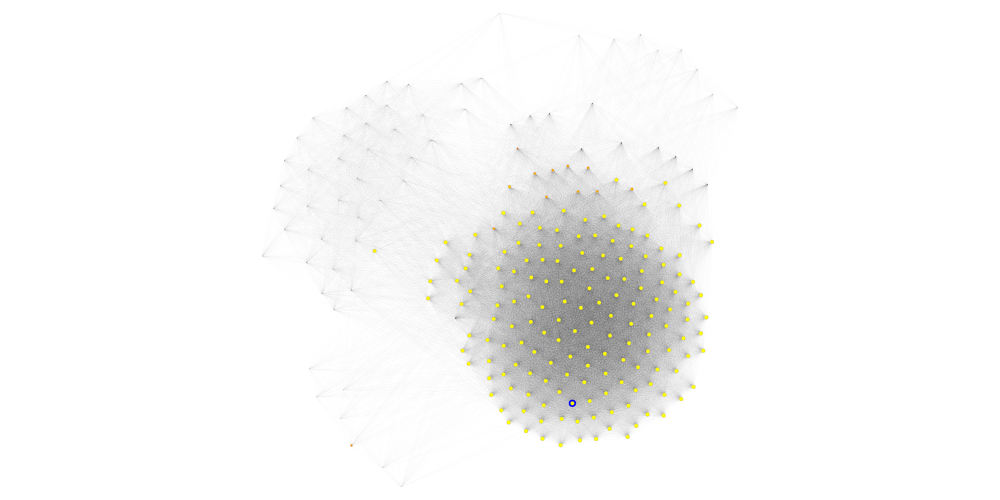

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x12eaa6358, at 0x12eaace48>

In [22]:
# Some pre-processing to make visualization better.
temp = np.copy(l1_reg_vector)
nnz_temp = temp.nonzero()
nnz_temp = nnz_temp[0]
temp[nnz_temp] = -np.log(temp[nnz_temp])
temp[nnz_temp] = 100/temp[nnz_temp]
temp = temp + 0.0001
max_all = max(temp)
temp[reference_node] = max_all/5
temp = temp/np.linalg.norm(temp, 2)

halo = np.zeros(g._num_vertices, dtype=bool)
halo[reference_node] = True
node_halo   = g_gtool.new_vertex_property("bool",halo)

node_weights = g_gtool.new_vertex_property("double",temp)
node_size = g_gtool.new_vertex_property("double",np.abs(temp)*50)

c_map = plt.get_cmap('autumn')

graph_draw(g_gtool, pos, output_size=(1000, 500),
           vertex_size=node_size, vertex_fill_color=node_weights, vorder=node_size,
           vertex_halo=node_halo,
           vertex_halo_size = 1.9,
           vertex_halo_color = "blue",
           edge_pen_width=0.1,
           edge_color = [0.0, 0, 0, 0.05],
           vcmap = c_map)

## Obtain the partition using the localized vector from l1-regularized PageRank

In [23]:
# Create an object for a C++ version of the sweep cut rounding procedure.
sc_fast = sweepCut_fast.SweepCut_fast()

# Call C++ version of sweep cut rounding on the l1-regularized PageRank solution.
output_sc_fast = sc_fast.produce([g],p=l1_reg_vector)

# Extract the partition for g and store it.
l1_reg_vector_rounded = output_sc_fast[0][0]

In [ ]:
print(l1_reg_vector_rounded)

[84, 164, 77, 64, 75, 54, 51, 89, 87, 76, 66, 61, 103, 127, 60, 79, 44, 83, 69, 97, 40, 41, 101, 43, 99, 82, 98, 105, 55, 107, 102, 85, 42, 56, 48, 47, 17, 106, 116, 93, 57, 15, 46, 91, 90, 88, 49, 104, 100, 81, 95, 63, 52, 45, 65, 111, 125, 58, 62, 124, 121, 120, 126, 50, 86, 96, 70, 110, 122, 59, 73, 184, 155, 53, 118, 112, 31, 28, 20, 94, 67, 68, 78, 71, 72, 92, 80, 117, 114, 113, 74, 109, 108, 154, 151, 119, 115]


## Visualize local partitioning

In [ ]:
# Plot solutions for rounded eigenvector
temp = np.zeros(g._num_vertices) + 6

temp[l1_reg_vector_rounded] = 15

node_size = g_gtool.new_vertex_property("double",temp)

halo = np.zeros(g._num_vertices, dtype=bool)
halo[l1_reg_vector_rounded] = True
node_halo   = g_gtool.new_vertex_property("bool",halo)

c_map = plt.get_cmap('nipy_spectral')

graph_draw(g_gtool, pos, output_size=(1000, 500),
           vertex_size=node_size, 
           vertex_fill_color=node_colours, 
           vorder=node_size,
           vertex_halo=node_halo,
           edge_pen_width=0.1,
           edge_color = [0.0, 0, 0, 0.05],
           vcmap = c_map)

# Load Protein structure similarity graph

In [ ]:
# Read graph. This also supports gml and graphml format.
# Details for this dataset can be found here: https://clusteval.sdu.dk/1/datasets/981 
g = graph_class_local.GraphLocal('./datasets/ASTRAL-small-sized-mammoth-sims-geq-2.graphml','graphml',' ')

## Compute layout for visualization

In [ ]:
# Add data to graphtool.
g_gtool = load_graph("./datasets/ASTRAL-small-sized-mammoth-sims-geq-2.graphml")
    
remove_self_loops(g_gtool)

# Load pre-computed coordinates for nodes.
ld_coord = np.loadtxt('./datasets/ASTRAL-small-sized-mammoth-sims-geq-2.xy', dtype = 'str')

temp = []
for i in ld_coord:
    temp.append(i[0])

idxs = dict(zip(temp, range(len(temp)))) 

pos = g_gtool.new_vertex_property("vector<double>")
for i in ld_coord:
    pos[idxs[i[0]]] = i[1:3]

## Visualize the graph ground truth

In [ ]:
ld_coord = np.loadtxt('./datasets/ASTRAL-small-sized-mammoth-sims-geq-2_groundTruth.csv', dtype = 'str')

cluster_type = []
for i in ld_coord:
    cluster_type.append(i[1])
cluster_type_set = set(cluster_type)

idxs_cluster_type = dict(zip(cluster_type_set, range(len(cluster_type_set)))) 

protein_color = np.zeros(len(cluster_type))
for i in range(len(cluster_type)):
    protein_color[idxs[ld_coord[i][0]]] = idxs_cluster_type[ld_coord[i][1]]
    
# Plot solutions for rounded eigenvector
node_colours = g_gtool.new_vertex_property("double",protein_color)

temp = np.zeros(g._num_vertices) + 6

node_size = g_gtool.new_vertex_property("double",temp)

c_map = plt.get_cmap('nipy_spectral')

graph_draw(g_gtool, pos, output_size=(1000, 500),
           vertex_size=node_size, 
           vertex_fill_color=node_colours, 
           vorder=node_size,
           edge_pen_width=0.1,
           edge_color = [0.0, 0, 0, 0.05],
           vcmap = c_map)

## Localized vector using l1-regularized PageRank

In [ ]:
# Create an object for an accelerated L1-regularized PageRank solver.
l1reg_fast = l1_regularized_PageRank_fast.L1_regularized_PageRank_fast()

# Find the solution of L1-regularized PageRank using localized accelerated gradient descent.
# This method is the fastest among other l1-regularized solvers and other approximate PageRank solvers.
reference_node = 772
output_l1reg_fast = l1reg_fast.produce([g],[reference_node],rho=6.5e-6)

# Only one input graph is given, i.e., [g]. 
# Extract the array from position 0 and store it.
l1_reg_vector = output_l1reg_fast[0]

## Obtain the partition using the localized vector from l1-regularized PageRank

In [ ]:
# Create an object for a C++ version of the sweep cut rounding procedure.
sc_fast = sweepCut_fast.SweepCut_fast()

# Call C++ version of sweep cut rounding on the l1-regularized PageRank solution.
output_sc_fast = sc_fast.produce([g],p=l1_reg_vector)

# Extract the partition for g and store it.
l1_reg_vector_rounded_1 = output_sc_fast[0][0]

## Visualize local partitioning

In [ ]:
# Plot solutions for rounded eigenvector
temp = np.zeros(g._num_vertices) + 6

temp[l1_reg_vector_rounded_1] = 15

node_size = g_gtool.new_vertex_property("double",temp)

halo = np.zeros(g._num_vertices, dtype=bool)
halo[l1_reg_vector_rounded_1] = True
node_halo   = g_gtool.new_vertex_property("bool",halo)

graph_draw(g_gtool, pos, output_size=(1000, 500),
           vertex_size=node_size, 
           vertex_fill_color=node_colours, 
           vorder=node_size,
           vertex_halo=node_halo,
           edge_pen_width=0.1,
           edge_color = [0.0, 0, 0, 0.05],
           vcmap = c_map)

## Localized vector using l1-regularized PageRank

In [ ]:
# Create an object for an accelerated L1-regularized PageRank solver.
l1reg_fast = l1_regularized_PageRank_fast.L1_regularized_PageRank_fast()

# Find the solution of L1-regularized PageRank using localized accelerated gradient descent.
# This method is the fastest among other l1-regularized solvers and other approximate PageRank solvers.
reference_node = 206
output_l1reg_fast = l1reg_fast.produce([g],[reference_node],rho=1.957e-5)

# Only one input graph is given, i.e., [g]. 
# Extract the array from position 0 and store it.
l1_reg_vector = output_l1reg_fast[0]

## Obtain the partition using the localized vector from l1-regularized PageRank

In [ ]:
# Create an object for a C++ version of the sweep cut rounding procedure.
sc_fast = sweepCut_fast.SweepCut_fast()

# Call C++ version of sweep cut rounding on the l1-regularized PageRank solution.
output_sc_fast = sc_fast.produce([g],p=l1_reg_vector)

# Extract the partition for g and store it.
l1_reg_vector_rounded_2 = output_sc_fast[0][0]

## Visualize local partitioning

In [ ]:
# Plot solutions for rounded eigenvector
temp = np.zeros(g._num_vertices) + 6

temp[l1_reg_vector_rounded_2] = 15

node_size = g_gtool.new_vertex_property("double",temp)

halo = np.zeros(g._num_vertices, dtype=bool)
halo[l1_reg_vector_rounded_2] = True
node_halo   = g_gtool.new_vertex_property("bool",halo)

graph_draw(g_gtool, pos, output_size=(1000, 500),
           vertex_size=node_size, 
           vertex_fill_color=node_colours, 
           vorder=node_size,
           vertex_halo=node_halo,
           edge_pen_width=0.1,
           edge_color = [0.0, 0, 0, 0.05],
           vcmap = c_map)